# R1221のenergy計算

In [22]:
%cd ~/desktop/RNA/casp16
pdb_dir="./datasets/casp16/R1221s2_AF3Fix-2A64_ViennaRNA/pdb"

!ls {pdb_dir}/*pdb | wc -l
# !python ./scripts/eval_scores.py --pdb_dir {pdb_dir} --out_dir {pdb_dir}

import os
out_files = [f for f in os.listdir(pdb_dir) if f.endswith(".briq.out")]
print(len(out_files))

/Users/sumishunsuke/Desktop/RNA/casp16
    1000
1000


# エネルギー書き出し

In [23]:
out_files = !ls {pdb_dir}/*briq.out

pdb_energy = {}
for out in out_files:
    with open(out) as fh: 
        lines = fh.readlines()
    energies = float(lines[-1].strip().replace("Energy: ", ""))
    basename = out.split("/")[-1].replace(".briq.out", "")
    pdb_energy[basename] = energies


pdb_energy["S_000001"]

import pandas as pd
df_briq = pd.DataFrame(pdb_energy.items(), columns=["pdb", "BRiQscore"])
print(df_briq.shape)
df_briq.head(3)

(1000, 2)


,pdb,BRiQscore
0,S_000001,21.7442
1,S_000002,50.1942
2,S_000003,69.5689


In [24]:
df_farfar = pd.read_csv(f"{pdb_dir}/R1221s2_AF3Fix-2A64_ViennaRNA_score.csv")
df_farfar = df_farfar[["score", "description"]]
df_farfar.columns = ["FARFARscore", "pdb"]
df_farfar.head(3)

df = pd.merge(df_briq, df_farfar, on="pdb")
df.head(3)
# df.to_csv(f"{pdb_dir}/R1221_scores.csv", index=False)

,pdb,BRiQscore,FARFARscore
0,S_000001,21.7442,4062.064
1,S_000002,50.1942,4110.807
2,S_000003,69.5689,4207.087


# 可視化

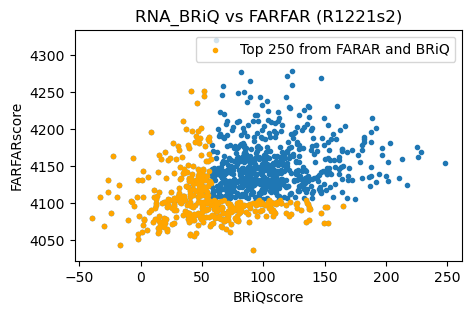

(392, 3)


In [25]:
import pandas as pd
import os
import matplotlib.pyplot as plt

df_scores = pd.read_csv(f"{pdb_dir}/R1221_scores.csv")



n_take = 250
df_briq_top = df_scores.sort_values("BRiQscore", ascending=True).head(n_take)
df_farfar_top = df_scores.sort_values("FARFARscore", ascending=True).head(n_take)
df_both_top = pd.concat([df_briq_top, df_farfar_top]).drop_duplicates()


plt.figure(figsize=(5,3))
plt.scatter(df_scores["BRiQscore"], df_scores["FARFARscore"], marker=".")
plt.scatter(df_both_top["BRiQscore"], df_both_top["FARFARscore"], marker=".", color="orange", label=f"Top {n_take} from FARAR and BRiQ")
plt.legend()
plt.xlabel("BRiQscore")
plt.ylabel("FARFARscore")
plt.title("RNA_BRiQ vs FARFAR (R1221s2)")
plt.show()
print(df_both_top.shape)

In [8]:
df_both_top.head()

,pdb,BRiQscore,FARFARscore
616,S_000617,-39.2647,4079.330
302,S_000303,-33.3906,4108.419
528,S_000529,-29.8601,4069.472
322,S_000323,-26.5489,4130.646
722,S_000723,-26.3691,4114.962


In [9]:
# cp selected pdb to new dir    
!mkdir -p ./datasets/casp16/R1221s2_AF3Fix-2A64_ViennaRNA/pdb_selected
for pdb in df_both_top["pdb"]:
    !cp {pdb_dir}/{pdb}.pdb ./datasets/casp16/R1221s2_AF3Fix-2A64_ViennaRNA/pdb_selected

# R1221の距離計算

In [30]:
pdb_sele_dir="./datasets/casp16/R1221s2_AF3Fix-2A64_ViennaRNA/pdb_selected"
from Bio import PDB
import numpy as np
import matplotlib.pyplot as plt
from Bio.PDB import PDBParser, Superimposer
import os
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [31]:
%cd ~/desktop/RNA/casp16
# !time python scripts/calc_rmsd.py --pdb_dir {pdb_sele_dir} --cpu 7

/Users/sumishunsuke/Desktop/RNA/casp16


In [44]:
# to dataframe
rmsd = np.load(f"{pdb_sele_dir}/rmsd_matrix_sorted_id.npy")
print(rmsd.shape)
pdb_selected = [f.replace(".pdb", "") for f in os.listdir(pdb_sele_dir) if f.endswith(".pdb")]
print(len(pdb_selected))
df_rmsd = pd.DataFrame(rmsd, columns=pdb_selected, index=pdb_selected)
df_rmsd.to_csv(f"{pdb_sele_dir}/rmsd_matrix_sorted_id.csv")
df_rmsd.head(3)

(392, 392)
392


,S_000132,S_000126,S_000683,S_000318,S_000442,S_000495,S_000278,S_000522,S_000250,S_000287,...,S_000513,S_000507,S_000261,S_000498,S_000329,S_000467,S_000881,S_000895,S_000665,S_000671
S_000132,0.000000,22.500450,14.845805,19.057645,16.039787,20.899452,14.461009,22.184632,17.975358,15.932378,...,20.956089,12.989151,13.302135,26.628441,22.530125,13.023219,13.336861,13.058845,13.554330,27.426029
S_000126,22.500450,0.000000,29.797271,29.938618,26.323523,12.261600,20.927330,14.002325,34.701763,26.520855,...,23.528506,21.611364,18.864609,20.380071,17.868048,31.028607,26.025017,23.277707,18.835301,17.632623
S_000683,14.845805,29.797271,0.000000,22.607083,13.750655,25.687663,19.290360,27.905817,12.915010,13.021003,...,25.997715,17.613417,22.532693,31.942631,26.211664,15.707472,12.441093,14.517435,19.337479,29.684723


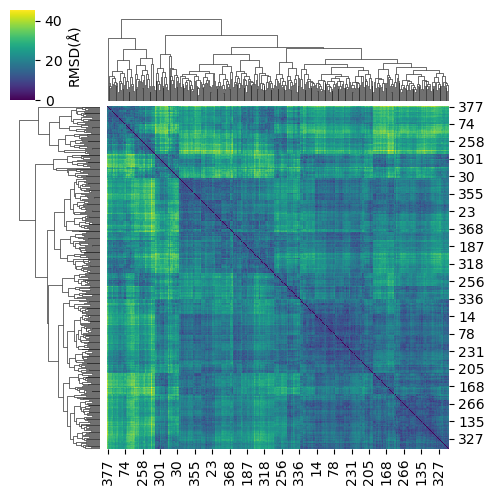

In [13]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

rmsd = np.load(f"{pdb_dir}/rmsd_matrix_sorted_id.npy")
g = sns.clustermap(rmsd, cmap="viridis", figsize=(5,5), cbar_kws={'label': 'RMSD(Å)', 'aspect': 20})
# plt.savefig(f"{pdb_sele_dir}/rmsd_clustermap.png", dpi = 300)

# MDS, DBSCAN

In [14]:
from sklearn.manifold import MDS

mds = MDS(n_components=2, dissimilarity="precomputed", random_state=42, n_jobs=7, max_iter=1000)
coords = mds.fit_transform(rmsd)

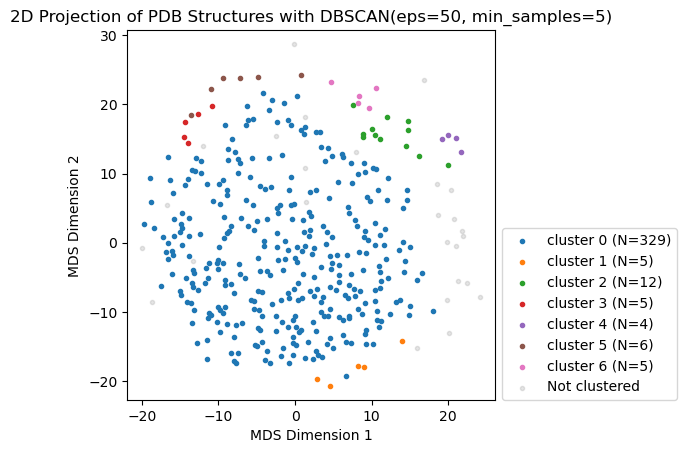

In [17]:
from sklearn.cluster import DBSCAN

eps = 50
min_samples = 5
clustering = DBSCAN(eps=eps, min_samples=min_samples).fit(rmsd)

plt.figure()
for c in set(clustering.labels_):
    if c == -1: 
        plt.scatter(coords[clustering.labels_ == c, 0], coords[clustering.labels_ == c, 1], label="Not clustered", marker=".", alpha=0.2)
    else:
        n = sum(clustering.labels_ == c)
        plt.scatter(coords[clustering.labels_ == c, 0], coords[clustering.labels_ == c, 1], label=f"cluster {c} (N={n})", marker=".")
plt.legend(loc = (1.02,0))
plt.xlim(min(coords[:, 0])-2, max(coords[:, 0])+2)
plt.ylim(min(coords[:, 1])-2, max(coords[:, 1])+2)

# plt.colorbar(label=label)
plt.xlabel('MDS Dimension 1')
plt.ylabel('MDS Dimension 2')
plt.title(f'2D Projection of PDB Structures with DBSCAN(eps={eps}, min_samples={min_samples})')
plt.subplots_adjust(right=0.7)
# plt.savefig(f"{pdb_dir}/rmsd_mds_dbscan.png", dpi = 300)
plt.show()


In [18]:
df_scores.head(3)

# pdb_selected = !ls ./datasets/casp16/R1212/pdb_selected/*pdb
pdb_selected = !ls {pdb_dir}/*pdb
pdb_selected = [os.path.basename(p).replace(".pdb", "") for p in pdb_selected]
df_scores_selected = df_scores[df_scores["pdb"].isin(pdb_selected)]
print(df_scores_selected.shape)
df_scores_selected.head(3)

(392, 3)


,pdb,BRiQscore,FARFARscore
0,S_000001,21.7442,4062.064
1,S_000002,50.1942,4110.807
6,S_000007,34.6418,4210.953


In [19]:
df_scores_selected["cluster"] = clustering.labels_
df_scores_selected.to_csv(f"{pdb_dir}/R1221_scores_clustered.csv", index=False)
df_scores_selected = pd.read_csv(f"{pdb_dir}/R1221_scores_clustered.csv")
df_scores_selected.head(3)

,pdb,BRiQscore,FARFARscore,cluster
0,S_000001,21.7442,4062.064,0
1,S_000002,50.1942,4110.807,2
2,S_000007,34.6418,4210.953,0


In [27]:
# for c in [0,1,2,3,4,5,6]:
for c in [0]:
    n = sum(df_scores_selected["cluster"] == c)
    print(f"Cluster {c} (N={n})")
    print(df_scores_selected[df_scores_selected["cluster"] == c].sort_values("BRiQscore").head())
    print("**"*20)
    print(df_scores_selected[df_scores_selected["cluster"] == c].sort_values("FARFARscore").head())
    print("**"*20)

Cluster 0 (N=329)
          pdb  BRiQscore  FARFARscore  cluster
233  S_000617   -39.2647     4079.330        0
111  S_000303   -33.3906     4108.419        0
199  S_000529   -29.8601     4069.472        0
120  S_000323   -26.5489     4130.646        0
282  S_000723   -26.3691     4114.962        0
****************************************
          pdb  BRiQscore  FARFARscore  cluster
216  S_000569   91.60830     4036.485        0
252  S_000670   43.58630     4055.292        0
64   S_000153   40.45710     4056.539        0
298  S_000755   -1.94673     4058.775        0
186  S_000505   40.69120     4058.807        0
****************************************


Text(0, 0.5, 'FARFARscore')

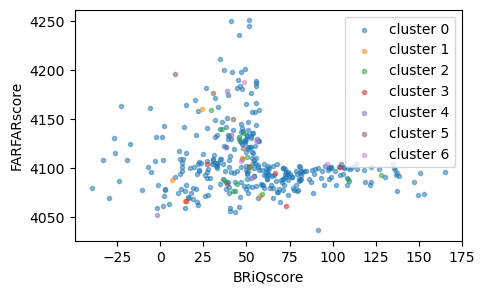

In [21]:
# scatter for each cluster
# hist2d

plt.figure(figsize=(5,3))
for c in set(df_scores_selected["cluster"]):
    if c == -1: continue
    plt.scatter(df_scores_selected[df_scores_selected["cluster"] == c]["BRiQscore"], df_scores_selected[df_scores_selected["cluster"] == c]["FARFARscore"], label=f"cluster {c}", marker=".", alpha=0.5)
    

plt.legend()
plt.xlabel("BRiQscore")
plt.ylabel("FARFARscore")

# add RMSD to2A64

In [52]:
import pandas as pd 

pdb_dir="./datasets/casp16/R1221s2_AF3Fix-2A64_ViennaRNA/pdb"
pdb_sele_dir="./datasets/casp16/R1221s2_AF3Fix-2A64_ViennaRNA/pdb_selected"


df_to_ref = pd.read_csv(f"{pdb_dir}/RMSD_R1221s2_2A64.csv", header=None)
df_to_ref.columns = ["pdb", "rmsd"]
df_to_ref["pdb"] = df_to_ref["pdb"].apply(lambda x: x.split("/")[-1].replace(".pdb", ""))
df_to_ref

,pdb,rmsd
0,S_000001,40.10
1,S_000002,36.30
2,S_000003,36.94
3,S_000004,43.27
4,S_000005,30.03
...,...,...
995,S_000996,39.08
996,S_000997,33.75
997,S_000998,35.85
998,S_000999,36.74


In [60]:
# merge 
df_rmsd = pd.read_csv(f"{pdb_sele_dir}/R1221_scores_clustered.csv")
df_rmsd_and_to_ref = pd.merge(df_rmsd, df_to_ref, on="pdb")
df_rmsd_and_to_ref = df_rmsd_and_to_ref[df_rmsd_and_to_ref["cluster"]==0]    

print("**"*10 + "sort by BRiQscore" + "**"*10)
print(df_rmsd_and_to_ref.sort_values("BRiQscore").head())
print("**"*10 + "sort by FARFARscore" + "**"*10)
print(df_rmsd_and_to_ref.sort_values("FARFARscore").head())
print("**"*10 + "sort by RMSD to 2A64" + "**"*10)
print(df_rmsd_and_to_ref.sort_values("rmsd").head())

********************sort by BRiQscore********************
          pdb  BRiQscore  FARFARscore  cluster   rmsd
233  S_000617   -39.2647     4079.330        0  30.87
111  S_000303   -33.3906     4108.419        0  36.66
199  S_000529   -29.8601     4069.472        0  41.76
120  S_000323   -26.5489     4130.646        0  34.31
282  S_000723   -26.3691     4114.962        0  45.61
********************sort by FARFARscore********************
          pdb  BRiQscore  FARFARscore  cluster   rmsd
216  S_000569   91.60830     4036.485        0  39.53
252  S_000670   43.58630     4055.292        0  34.30
64   S_000153   40.45710     4056.539        0  36.91
298  S_000755   -1.94673     4058.775        0  35.88
186  S_000505   40.69120     4058.807        0  40.91
********************sort by RMSD to 2A64********************
          pdb  BRiQscore  FARFARscore  cluster   rmsd
221  S_000584   109.0540     4100.420        0  27.36
5    S_000015    64.1768     4082.581        0  27.92
81   S_0002